# How to use `RandomTree.jl`

## Load the packages

In [1]:
using RandomTree

In [2]:
using BenchmarkTools # For testing the speed

In [3]:
using Statistics

In [4]:
using Plots

┌ Info: Recompiling stale cache file /home/xing/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [5]:
using StatsBase

## Genrate random trees

We generate a Catalan trees of size 5. 

In [6]:
tree = CatalanTree(5)
degseq = degrees(tree)
println(degseq)

[2, 1, 1, 0, 0]


This tree is represented by its degree sequnce in depth-first-search order. It's corresponding to the following tree

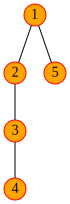

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("image/svg+xml")}, ::PyCall.PyObject) at PyCall.jl:895
└ @ PyCall /home/xing/.julia/packages/PyCall/ttONZ/src/PyCall.jl:895


In [7]:
drawtree(degseq, true)

The algorithm for generting the degree sequneces is very fast. For example, for trees of size $10^6$, it take about 30ms

In [8]:
tree = CatalanTree(10^6)
@btime degrees(tree);

  15.767 ms (9 allocations: 15.26 MiB)


For Cayley tree and Binary tree (0 or 2 children), it's even faster

In [9]:
tree = CayleyTree(10^6)
@btime degrees(tree);

  10.855 ms (5 allocations: 7.65 MiB)


In [10]:
tree = BinaryTree(10^6)
@btime degrees(tree);

  10.569 ms (4 allocations: 7.63 MiB)


We can also generate fixed full-d-ary trees

In [11]:
tree = FullDAryTree(4, 2)

Full 2-arry tree (height 4) of size 31

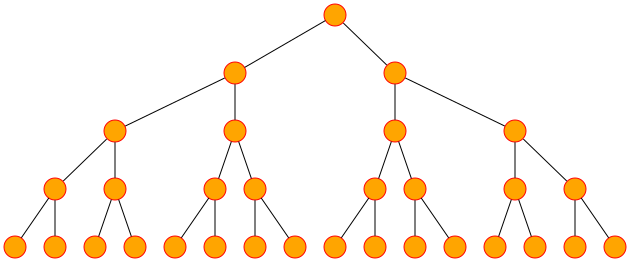

In [12]:
drawtree(tree)

## Simulations on trees

Several types of simulation on random trees are provided. For example, it is know that the number of leaves in a Cayley tree of size $n$ has expectation $n e^{-1}$ and has a normal limit distribution. Let's see if it's true by generate 2000 samples.

In [13]:
tree = CayleyTree(10^6)
sim = LeafSimulator(tree)

leaf number simulation of Cayley Tree of size 1000000

In [14]:
samples = simulation(sim, 2000);

The mean is about

In [15]:
mu = mean(samples)

367880.4965

Comparing with theoretical expectaion.

In [16]:
mu/(10^6*exp(-1))

1.0000028686804414

If we shift the samples by its mean and rescale by square root of the variance and draw a histogram, it does look a bit like a normal distribution.

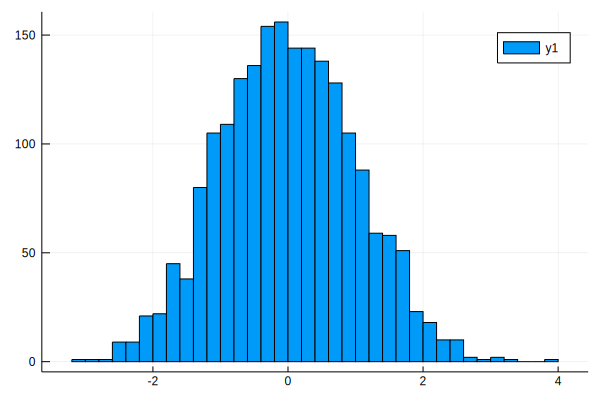

In [17]:
sigma = std(samples)
samples_rescaled = @. (samples-mu)/sigma;
histogram(samples_rescaled)

The moments also suggest a normal distribution.

In [18]:
print([round(moment(samples_rescaled, r), digits=3) for r in 1:7])

[0.0, 1.0, 0.088, 2.838, 0.97, 13.55, 11.872]

## Drawing trees

To draw trees, you must have the graph drawing software [Graphviz](http://www.graphviz.org/) and this [Python package](https://github.com/xflr6/graphviz) installed.

If you want draw a tree from a degree sequence

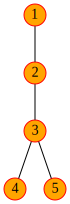

In [19]:
drawtree([1, 1, 2, 0, 0], true)

If you want to draw some random trees

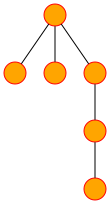

In [20]:
tree = CayleyTree(6)
drawtree(tree)

Conditional Galton-Watson trees are considered tall and skinny. Let's see it with our eyes.

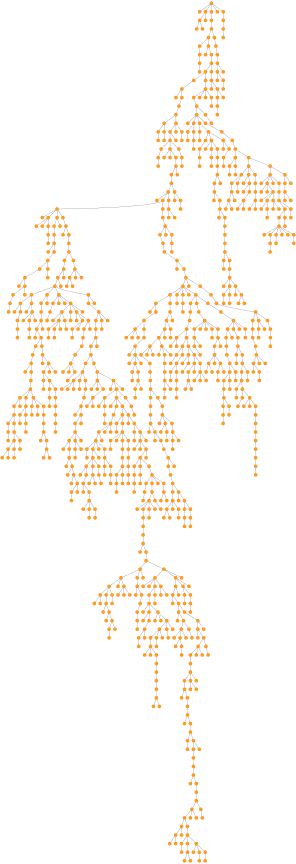

In [21]:
tree = CayleyTree(1000)
drawtree(tree)

But random recursive trees are much shorter

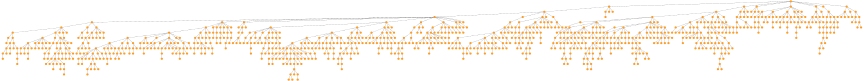

In [22]:
tree = RandomRecursiveTree(1000)
drawtree(tree)